<a href="https://colab.research.google.com/github/nocturnal-deviant/nocturnal-deviant/blob/main/Speech_emotion_recognition(SER)_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import nltk
import re
from nltk.stem import WordNetLemmatizer

In [70]:
df=pd.read_csv('/content/data.csv',header=None,sep=';',encoding='ISO-8859-1')
df.columns=['Comment','Result']
df.head()

,Comment,Result
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness


In [71]:
df.shape

(2000, 2)

In [72]:
print(df.isna().sum())

Comment    0
Result     0
dtype: int64


<Axes: xlabel='Result', ylabel='count'>

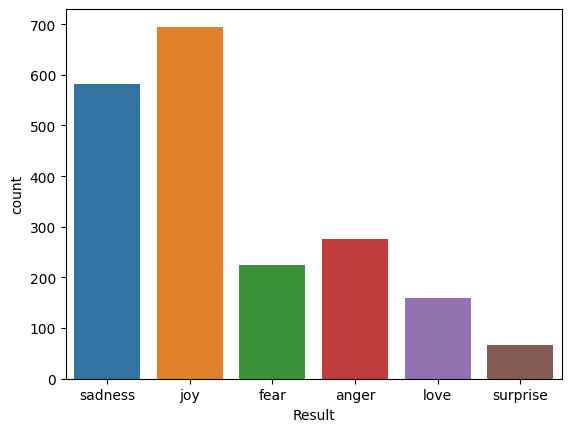

In [73]:
sns.countplot(x='Result',data=df)

In [74]:
df.value_counts(['Result'])

Result  
joy         695
sadness     581
anger       275
fear        224
love        159
surprise     66
dtype: int64

In [75]:
df

,Comment,Result
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness
...,...,...
1995,i just keep feeling like someone is being unki...,anger
1996,im feeling a little cranky negative after this...,anger
1997,i feel that i am useful to my people and that ...,joy
1998,im feeling more comfortable with derby i feel ...,joy


In [76]:
df['Result']=df['Result'].map({'joy':1,'sadness':'0','anger':-1,'fear':-2,'love':2,'surprise':3})
df

,Comment,Result
0,im feeling rather rotten so im not very ambiti...,0
1,im updating my blog because i feel shitty,0
2,i never make her separate from me because i do...,0
3,i left with my bouquet of red and yellow tulip...,1
4,i was feeling a little vain when i did this one,0
...,...,...
1995,i just keep feeling like someone is being unki...,-1
1996,im feeling a little cranky negative after this...,-1
1997,i feel that i am useful to my people and that ...,1
1998,im feeling more comfortable with derby i feel ...,1


In [77]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [78]:
sen=df.Comment
sen

0       im feeling rather rotten so im not very ambiti...
1               im updating my blog because i feel shitty
2       i never make her separate from me because i do...
3       i left with my bouquet of red and yellow tulip...
4         i was feeling a little vain when i did this one
                              ...                        
1995    i just keep feeling like someone is being unki...
1996    im feeling a little cranky negative after this...
1997    i feel that i am useful to my people and that ...
1998    im feeling more comfortable with derby i feel ...
1999    i feel all weird when i have to meet w people ...
Name: Comment, Length: 2000, dtype: object

In [79]:
#Tokenizing the input Value
from nltk import TweetTokenizer
tk=TweetTokenizer()
sen=sen.apply(lambda x:tk.tokenize(x)).apply(lambda x:" ".join(x))
sen

0       im feeling rather rotten so im not very ambiti...
1               im updating my blog because i feel shitty
2       i never make her separate from me because i do...
3       i left with my bouquet of red and yellow tulip...
4         i was feeling a little vain when i did this one
                              ...                        
1995    i just keep feeling like someone is being unki...
1996    im feeling a little cranky negative after this...
1997    i feel that i am useful to my people and that ...
1998    im feeling more comfortable with derby i feel ...
1999    i feel all weird when i have to meet w people ...
Name: Comment, Length: 2000, dtype: object

In [80]:
#removing all the unwanted values
sen=sen.str.replace('[^a-zA-Z0-9]+'," ")
sen

<ipython-input-80-a76a46fbf028>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  sen=sen.str.replace('[^a-zA-Z0-9]+'," ")


0       im feeling rather rotten so im not very ambiti...
1               im updating my blog because i feel shitty
2       i never make her separate from me because i do...
3       i left with my bouquet of red and yellow tulip...
4         i was feeling a little vain when i did this one
                              ...                        
1995    i just keep feeling like someone is being unki...
1996    im feeling a little cranky negative after this...
1997    i feel that i am useful to my people and that ...
1998    im feeling more comfortable with derby i feel ...
1999    i feel all weird when i have to meet w people ...
Name: Comment, Length: 2000, dtype: object

In [81]:
#tokenizing the input data and removing all the words which have letters less than or equal to 3
from nltk.tokenize import word_tokenize
sen=sen.apply(lambda x:' '.join([w for w in word_tokenize(x) if len(w)>=3]))
sen

0       feeling rather rotten not very ambitious right...
1                       updating blog because feel shitty
2       never make her separate from because don ever ...
3       left with bouquet red and yellow tulips under ...
4               was feeling little vain when did this one
                              ...                        
1995    just keep feeling like someone being unkind an...
1996    feeling little cranky negative after this doct...
1997    feel that useful people and that gives great f...
1998    feeling more comfortable with derby feel thoug...
1999    feel all weird when have meet people text but ...
Name: Comment, Length: 2000, dtype: object

In [82]:
#stemming the input data
from IPython.lib.display import join
from nltk.stem import SnowballStemmer
stemming=SnowballStemmer('english')
sen=sen.apply(lambda x:[stemming.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda x:' '.join(x))
sen

0            feel rather rotten not veri ambiti right now
1                           updat blog becaus feel shitti
2       never make her separ from becaus don ever want...
3       left with bouquet red and yellow tulip under a...
4                   was feel littl vain when did this one
                              ...                        
1995    just keep feel like someon be unkind and do wr...
1996    feel littl cranki negat after this doctor appoint
1997    feel that use peopl and that give great feel a...
1998    feel more comfort with derbi feel though can s...
1999    feel all weird when have meet peopl text but l...
Name: Comment, Length: 2000, dtype: object

In [83]:
#removing all the stopwords such as-- as,is,the...etc
from nltk.corpus import stopwords
stop=stopwords.words('english')
sen=sen.apply(lambda x:[i for i in word_tokenize(x) if i not in stop]).apply(lambda x:' '.join(x))
sen

0                    feel rather rotten veri ambiti right
1                           updat blog becaus feel shitti
2       never make separ becaus ever want feel like asham
3       left bouquet red yellow tulip arm feel slight ...
4                                     feel littl vain one
                              ...                        
1995    keep feel like someon unkind wrong think get b...
1996               feel littl cranki negat doctor appoint
1997                feel use peopl give great feel achiev
1998      feel comfort derbi feel though start step shell
1999    feel weird meet peopl text like dont talk face...
Name: Comment, Length: 2000, dtype: object

In [84]:
#tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
train_data_vec=vec.fit_transform(sen)

In [85]:
print(train_data_vec)

  (0, 2553)	0.3525206659216167
  (0, 98)	0.5970184346826175
  (0, 3268)	0.30019285951137303
  (0, 2572)	0.48347101928239655
  (0, 2434)	0.43545827682684896
  (0, 1126)	0.07625141639808446
  (1, 2704)	0.5529026849907179
  (1, 269)	0.3210442042890142
  (1, 335)	0.4682230979986319
  (1, 3235)	0.6036490629872274
  (1, 1126)	0.0872019442311611
  (2, 171)	0.4228718200599938
  (2, 1756)	0.1877256511937284
  (2, 3313)	0.2851225901897992
  (2, 1045)	0.36680711338073196
  (2, 2666)	0.54674742251413
  (2, 1829)	0.2722561689967443
  (2, 2025)	0.3550609242851194
  (2, 269)	0.2570902368501683
  (2, 1126)	0.0698307840374601
  (3, 163)	0.3311215673146289
  (3, 2119)	0.31140566668036584
  (3, 2771)	0.2804804623202068
  (3, 158)	0.32362592977294535
  (3, 3165)	0.3845420227023279
  :	:
  (1996, 2015)	0.44266521698798833
  (1996, 1773)	0.2747178011913203
  (1996, 1126)	0.0685548304761141
  (1997, 23)	0.5553416271706125
  (1997, 1278)	0.4213982197974698
  (1997, 1324)	0.4581424141232009
  (1997, 3244)	0.41

In [86]:
train_data_vec.shape

(2000, 3459)

In [98]:
y=df['Result'].values
# y=y.dtype('int')
y=y.astype('int')
y

array([ 0,  0,  0, ...,  1,  1, -2])

In [99]:
y.shape

(2000,)

In [100]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(train_data_vec,y,test_size=0.30,random_state=42)

In [102]:
#creating model using KNieghbors Algorithm
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5)
classifier.fit(xtrain,ytrain)

KNeighborsClassifier()

In [107]:
from sklearn.svm import SVC
model=SVC()
model.fit(xtrain,ytrain)

SVC()

In [103]:
#KNeighbors Algorithm
ypred=classifier.predict(xtest)
ypred

array([ 0,  2,  2, -2,  1, -2, -2,  2,  0,  1,  0,  0,  0,  0,  1,  0,  0,
       -2,  1, -2,  1, -1,  0, -2,  0,  1,  1,  1,  1,  1,  1,  0,  0, -1,
        0,  0,  0,  0, -1,  1,  0, -2,  0, -2,  1, -2, -2,  1,  0,  1,  1,
       -1,  1,  1,  0, -1,  1,  0, -2, -2,  1,  1,  0,  1,  1,  1,  1,  0,
        1,  1,  0, -2,  2,  3,  0,  0,  1, -1, -1, -1,  3,  1,  0, -1,  1,
        1,  0,  1,  0,  1, -1,  1, -1,  0,  0,  1,  0,  2, -2, -2, -2,  1,
        1,  1,  1,  1,  0,  1,  0,  0,  1, -1,  0,  0,  0, -1,  0,  0,  0,
       -2,  1,  1, -1,  1,  0,  0, -1,  2,  0, -2, -2,  1,  3,  2, -2,  0,
        0, -2,  1,  1,  1, -2, -1, -1,  1,  1,  0,  1,  1,  0,  0,  0,  1,
        2, -1,  1,  1, -2,  1, -2,  1, -2, -2, -1,  2, -2,  0,  0,  0,  1,
        0,  0, -2, -2,  1,  1,  1, -1, -1,  1, -2,  1,  0, -2,  0,  0, -2,
        0,  0,  0, -1, -1, -2,  1,  1, -2,  0,  2, -1,  0,  1, -2,  1,  1,
        1,  1,  1,  0,  1, -2,  1,  1,  1, -2,  1,  1,  0,  1,  0,  2, -1,
       -2,  1,  0,  0,  1

In [108]:
#Support Vector Machine
y_pred=model.predict(xtest)
y_pred

array([ 0,  1,  2,  1,  1,  1,  1,  0,  1,  1,  0,  0,  0,  0,  1,  1,  0,
        1,  1,  1,  1,  0,  0,  1,  0,  1,  1,  1,  1,  1,  1,  0,  1,  1,
        0,  0,  1,  1,  1,  1,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  0,  1,  1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  0,  1,  1,
        1,  1,  1,  0,  1, -1,  1,  1,  0,  0,  1,  1,  1,  1,  1, -2,  1,
        1,  1,  1,  1,  0,  1,  1,  0,  1,  1,  1,  0,  1,  1,  0,  0,  0,
        0,  1,  1,  1,  1,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  0,
        1,  1,  1,  1,  1,  0,  0,  0,  1,  1,  1,  0,  1,  1,  0,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  0,  0,  0,  1,  0,  0,  0,  1,
        1,  0,  0,  1,  1,  1,  1,  1,  1,  1, -2,  1,  1,  1,  0,  0,  1,
        0,  1,  0,  0,  1, -2,  0,  1,  1,  1,  1,  1,  0,  1,  1,  1,  1,
        1,  1,  1,  0,  1,  1,  1,  1,  1,  0,  1,  0,  1,  1,  1,  1,  1,
        1,  1,  0,  0,  1

**The model's accuracy will be low because there is less data available for it to learn from. With a smaller dataset, there is less information for the model to use to make accurate predictions or classifications. This can lead to overfitting, where the model becomes too focused on the small amount of data it has and may not perform well on new data. It is important to consider the size and quality of the dataset when building machine learning models to ensure their accuracy and effectivenes.**




In [105]:
#Accuracy SCore using KNeighbors Classifier Algorithm
from sklearn.metrics import classification_report,accuracy_score
print('Accuracy Score=',accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))

Accuracy Score= 0.6083333333333333
              precision    recall  f1-score   support

          -2       0.47      0.69      0.56        64
          -1       0.54      0.53      0.54        70
           0       0.63      0.70      0.66       184
           1       0.70      0.66      0.68       211
           2       0.43      0.20      0.27        50
           3       0.50      0.24      0.32        21

    accuracy                           0.61       600
   macro avg       0.55      0.50      0.51       600
weighted avg       0.61      0.61      0.60       600



In [111]:
#Accuracy Score Using Support Vector Machine ALgorithm
print('Accuracy Score',accuracy_score(ytest,y_pred))
print(classification_report(ytest,y_pred))

Accuracy Score 0.5716666666666667
              precision    recall  f1-score   support

          -2       0.83      0.16      0.26        64
          -1       0.90      0.13      0.23        70
           0       0.74      0.65      0.69       184
           1       0.49      0.96      0.65       211
           2       0.67      0.04      0.08        50
           3       0.00      0.00      0.00        21

    accuracy                           0.57       600
   macro avg       0.60      0.32      0.32       600
weighted avg       0.65      0.57      0.50       600



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


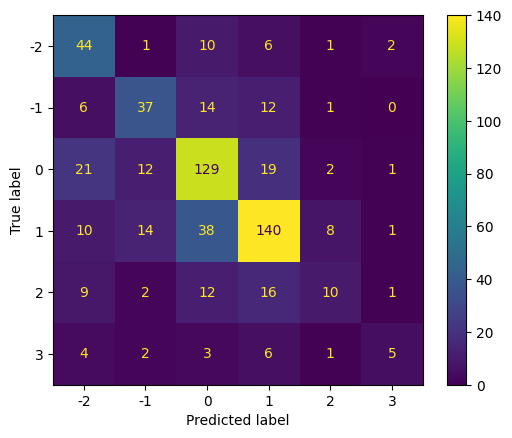

In [106]:
#Confusion Display Matrix Using KNeighbors Classifier
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(ytest,ypred)

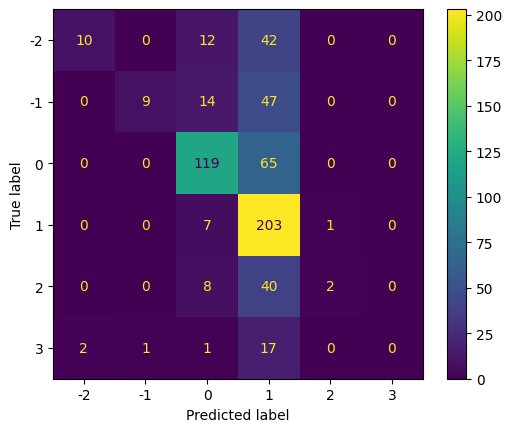

In [112]:
ConfusionMatrixDisplay.from_predictions(ytest,y_pred)
#COnfusion Matrix Display -Support Vector Algorithm

In [109]:
from nltk.metrics.scores import accuracy
print('Accuracy Score',accuracy(ytest,y_pred))

Accuracy Score 0.5716666666666667
